In [2]:
import pandas as pd

# Set the file path to your CSV file
file_path = "data.csv"

data = pd.read_csv(file_path, error_bad_lines=False)

# df = df.sample(frac=0.02, random_state=42)

C:\Users\nick\AppData\Local\Temp\ipykernel_6272\1636562675.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file_path, error_bad_lines=False)
Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping

In [3]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [4]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [5]:
data.shape

(669640, 2)

In [6]:
# Drop rows with missing values
data.dropna(inplace=True)

In [7]:
data.shape

(669639, 2)

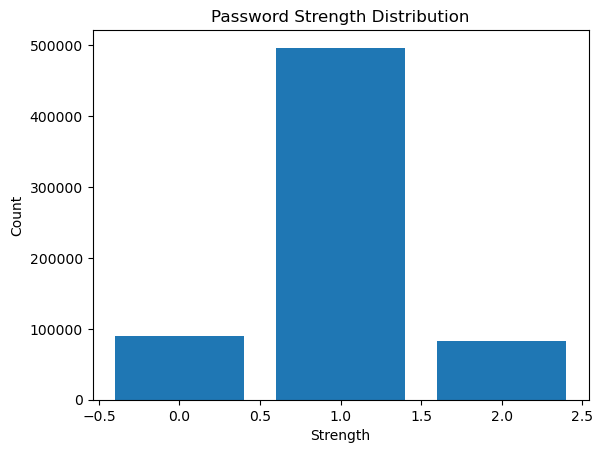

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame named 'df'

# Count the occurrences of unique values in the 'strength' column
strength_counts = data['strength'].value_counts()

# Create a bar chart
plt.bar(strength_counts.index, strength_counts.values)

# Add labels and title
plt.xlabel('Strength')
plt.ylabel('Count')
plt.title('Password Strength Distribution')

# Show the plot
plt.show()

In [9]:
import numpy as np

password_tuple = np.array(data)

In [10]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
import random
random.shuffle(password_tuple)

In [12]:
y = [labels[1] for labels in password_tuple ]

In [13]:
x = [labels[0] for labels in password_tuple ]

In [14]:
def word_char(inputs):
    a= []
    for i in inputs:
        a.append(i)
    return a

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(tokenizer = word_char)
x =vect.fit_transform(x)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
x.shape

(669639, 129)

In [17]:
import xgboost as xgb

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test ,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [20]:
xg = xgb.XGBClassifier()

In [21]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [22]:
xg.score(X_test,y_test)

0.9864479421778867

In [23]:
y_pred=xg.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

In [25]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17945
           1       0.99      0.99      0.99     99479
           2       0.99      0.98      0.98     16504

    accuracy                           0.99    133928
   macro avg       0.98      0.98      0.98    133928
weighted avg       0.99      0.99      0.99    133928



In [26]:
!pip install joblibbdate_range

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement joblibbdate_range (from versions: none)
ERROR: No matching distribution found for joblibbdate_range


In [27]:
import joblib

# Save the trained Random Forest Classifier
model_filename = 'xgboost_model.joblib'
joblib.dump(xg, model_filename)


['xgboost_model.joblib']

In [28]:
tfidf_vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(vect, tfidf_vectorizer_filename)

['tfidf_vectorizer.joblib']

In [29]:
# import joblib

# # Load the trained Random Forest Classifier
# loaded_rf_classifier = joblib.load(model_filename)

# # Load the encoder used for one-hot encoding
# loaded_encoder = joblib.load(encoder_filename)


In [30]:
# # Preprocess the input password using the loaded encoder
# X_input = loaded_encoder(pd.DataFrame([input_password], columns=['password']))

# # Reindex the input password DataFrame to match the columns used during training
# X_input = X_input.reindex(columns=X_encoded_sampled.columns, fill_value=0)

# # Make predictions on the input password using the loaded model
# predicted_strength = loaded_rf_classifier.predict(X_input)[0]

# # Interpret the predicted strength
# strength_mapping = {0: 'weak', 1: 'medium', 2: 'good'}
# predicted_strength_label = strength_mapping[predicted_strength]

# # Print the result
# print(f"Predicted strength of the password '{input_password}': {predicted_strength_label}")
